In [72]:
import pandas as pd
import numpy as np

# Gathering Data

In [73]:
from sklearn.datasets import load_breast_cancer
df= load_breast_cancer(as_frame=True)
X = df.data
y = df.target

In [74]:
# X.isnull().sum()
X.shape

(569, 30)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [76]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


# Standardization

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

(455, 30)


array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

# KNN

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) * 100

95.6140350877193

# Finding appropriate value of k

In [88]:
acc_score = []

for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc_score.append(np.round(accuracy_score(y_test,y_pred)*100 , 2))

acc_score

[np.float64(95.61),
 np.float64(94.74),
 np.float64(99.12),
 np.float64(98.25),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(98.25),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(97.37),
 np.float64(96.49)]

Text(0, 0.5, 'accuracy score')

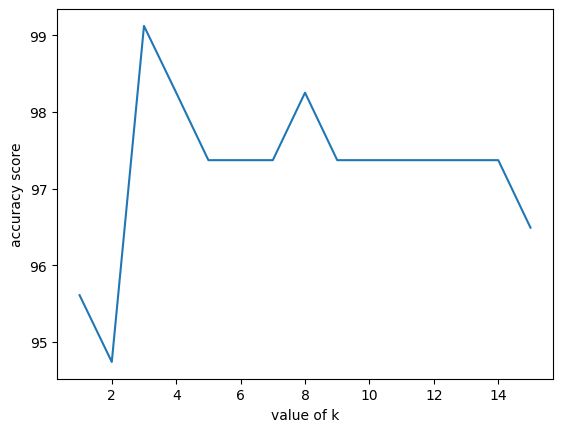

In [90]:
import matplotlib.pyplot as plt
plt.plot(range(1,16), acc_score)
plt.xlabel('value of k')
plt.ylabel('accuracy score')